In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
file = "./DEA_results.tsv"
df_dea = pd.read_csv(file, sep="\t")
df_dea = df_dea.sort_values(by='gene')
df_dea.reset_index()

,index,gene,log2FC,p_value,q_value,signif
0,52,1,11.078415,8.870428e-14,1.663076e-13,True
1,73,2,10.392775,3.073178e-11,4.152943e-11,True
2,86,3,7.645877,1.119732e-09,1.287048e-09,True
3,96,4,7.112191,2.663563e-07,2.745941e-07,True
4,90,5,7.854086,4.315141e-09,4.741913e-09,True
5,49,6,10.376782,4.370014e-14,8.740028e-14,True
6,22,7,12.380924,4.202157e-17,1.827025e-16,True
7,60,8,10.399738,3.563209e-13,5.841326e-13,True
8,79,9,8.495918,1.376771e-10,1.720964e-10,True
9,25,10,12.822347,8.495834e-17,3.205548e-16,True


In [4]:
file = "./DEA_results_BM.tsv"
df_dea_BM = pd.read_csv(file, sep="\t")
df_dea_BM = df_dea_BM.sort_values(by='gene')
df_dea_BM.reset_index()

,index,gene,log2FC,p_value,q_value,signif
0,21,1,2.708213,4.583718e-03,1.065981e-02,True
1,50,2,-1.336284,9.480978e-01,9.597644e-01,False
2,25,3,2.346852,1.861205e-02,3.511708e-02,True
3,58,4,-0.966267,4.830492e-01,5.750586e-01,False
4,70,5,-2.337060,3.274953e-02,5.550768e-02,False
5,95,6,-5.829310,2.686968e-06,1.791312e-05,True
6,71,7,-2.445610,2.710512e-02,4.755284e-02,True
7,3,8,10.741733,5.500859e-12,1.375215e-10,True
8,5,9,7.842956,1.747090e-09,2.911816e-08,True
9,75,10,-2.984491,1.331370e-02,2.662741e-02,True


In [5]:
# EGX result
file = "./EGX_readcounts_long.csv"
df_egx = pd.read_csv(file)
df_egx["ou2_theta"] = df_egx["ou2_theta"].apply(lambda x: max(x, 0.1)) # replace negative thetas
df_egx

,gene,ou1_conv,ou1_theta,ou1_alpha,ou1_sigma_sq,ou1_gamma,ou1_loglik,ou2_conv,ou2_theta,ou2_alpha,ou2_sigma_sq,ou2_gamma,ou2_loglik,brown_conv,brown_theta,brown_sigma_sq,brown_gamma,brown_loglik,ou2_vs_bm_pvalue,ou2_vs_ou1_pvalue,qvalue,adaptive
0,1,1,8.148148,1.814060e-02,1.193818,3.997840,-535.555862,1,6.867325e+00,6.531011e-02,2.098637,1.627050,-530.500604,1,8.165784,0.830309,6.860399,-535.897025,4.532778e-03,1.018934e-03,4.532778e-03,True
1,1,1,8.148148,1.814060e-02,1.193818,3.997840,-535.555862,1,1.671321e+01,6.531011e-02,2.098637,1.627050,-530.500604,1,8.165784,0.830309,6.860399,-535.897025,4.532778e-03,1.018934e-03,4.532778e-03,True
2,2,1,7.462046,1.174623e-10,0.783213,8.494916,-541.079997,1,6.306752e+00,6.852712e-03,0.785107,8.673397,-538.504426,1,7.462046,0.783213,8.494916,-541.079997,7.611032e-02,2.323108e-02,7.611032e-02,False
3,2,1,7.462046,1.174623e-10,0.783213,8.494916,-541.079997,1,5.466432e+01,6.852712e-03,0.785107,8.673397,-538.504426,1,7.462046,0.783213,8.494916,-541.079997,7.611032e-02,2.323108e-02,7.611032e-02,False
4,3,1,7.047138,1.082483e-02,0.820268,7.958165,-535.948008,1,6.209524e+00,3.730177e-02,1.181401,5.010661,-533.675321,1,7.047874,0.663384,10.417879,-536.054952,9.258479e-02,2.914106e-02,9.258479e-02,False
5,3,1,7.047138,1.082483e-02,0.820268,7.958165,-535.948008,1,1.539483e+01,3.730177e-02,1.181401,5.010661,-533.675321,1,7.047874,0.663384,10.417879,-536.054952,9.258479e-02,2.914106e-02,9.258479e-02,False
6,4,1,7.730857,1.174623e-10,0.673738,13.901783,-554.401443,1,6.634392e+00,5.594656e-03,0.641634,15.032827,-551.680486,1,7.730857,0.673738,13.901784,-554.401443,6.581176e-02,1.965912e-02,6.581176e-02,False
7,4,1,7.730857,1.174623e-10,0.673738,13.901783,-554.401443,1,6.179929e+01,5.594656e-03,0.641634,15.032827,-551.680486,1,7.730857,0.673738,13.901784,-554.401443,6.581176e-02,1.965912e-02,6.581176e-02,False
8,5,1,7.477517,4.841706e-10,0.585451,15.716389,-548.345071,1,6.513875e+00,1.734120e-09,0.509773,18.719745,-546.108500,1,7.477517,0.585450,15.716454,-548.345071,1.068242e-01,3.443161e-02,1.068242e-01,False
9,5,1,7.477517,4.841706e-10,0.585451,15.716389,-548.345071,1,1.447278e+08,1.734120e-09,0.509773,18.719745,-546.108500,1,7.477517,0.585450,15.716454,-548.345071,1.068242e-01,3.443161e-02,1.068242e-01,False


In [6]:
# EGX result
file = "./EGX_readcounts_BM_long.csv"
df_egx_BM = pd.read_csv(file)
df_egx_BM["ou2_theta"] = df_egx_BM["ou2_theta"].apply(lambda x: max(x, 0.1)) # replace negative thetas
df_egx_BM

,gene,ou1_conv,ou1_theta,ou1_alpha,ou1_sigma_sq,ou1_gamma,ou1_loglik,ou2_conv,ou2_theta,ou2_alpha,ou2_sigma_sq,ou2_gamma,ou2_loglik,brown_conv,brown_theta,brown_sigma_sq,brown_gamma,brown_loglik,ou2_vs_bm_pvalue,ou2_vs_ou1_pvalue,qvalue,adaptive
0,1,1,5.716552,6.154281e-02,1.618087,3.095912e+00,-530.201431,1,5.456388e+00,6.891377e-02,1.754265,2.762953e+00,-529.745629,1,5.752304,0.585902,12.193880,-533.030150,0.037459,0.010377,0.037459,True
1,1,1,5.716552,6.154281e-02,1.618087,3.095912e+00,-530.201431,1,7.485209e+00,6.891377e-02,1.754265,2.762953e+00,-529.745629,1,5.752304,0.585902,12.193880,-533.030150,0.037459,0.010377,0.037459,True
2,2,1,5.915651,1.349246e-10,0.504307,7.788278e+00,-493.876114,1,6.429353e+00,1.226318e-09,0.500599,7.788315e+00,-493.160446,1,5.915651,0.504307,7.788279,-493.876114,0.488865,0.231546,0.488865,False
3,2,1,5.915651,1.349246e-10,0.504307,7.788278e+00,-493.876114,1,1.000000e-01,1.226318e-09,0.500599,7.788315e+00,-493.160446,1,5.915651,0.504307,7.788279,-493.876114,0.488865,0.231546,0.488865,False
4,3,1,5.515116,1.510951e-02,0.685520,9.830082e+00,-527.859185,1,5.603041e+00,1.423084e-02,0.671110,1.010599e+01,-527.834690,1,5.534523,0.477265,15.581378,-527.987001,0.858721,0.581000,0.858721,False
5,3,1,5.515116,1.510951e-02,0.685520,9.830082e+00,-527.859185,1,3.724019e+00,1.423084e-02,0.671110,1.010599e+01,-527.834690,1,5.534523,0.477265,15.581378,-527.987001,0.858721,0.581000,0.858721,False
6,4,1,4.540990,1.349246e-10,0.435304,7.907125e+00,-480.379353,1,4.964337e+00,1.871003e-03,0.438805,7.864521e+00,-479.773812,1,4.540990,0.435302,7.907185,-480.379354,0.545779,0.271118,0.545779,False
7,4,1,4.540990,1.349246e-10,0.435304,7.907125e+00,-480.379353,1,1.000000e-01,1.871003e-03,0.438805,7.864521e+00,-479.773812,1,4.540990,0.435302,7.907185,-480.379354,0.545779,0.271118,0.545779,False
8,5,1,5.320493,3.549588e-02,0.985878,4.785712e+00,-514.913060,1,5.440609e+00,3.744080e-02,1.015227,4.597514e+00,-514.849088,1,5.256139,0.498707,11.843884,-515.700188,0.426945,0.192000,0.426945,False
9,5,1,5.320493,3.549588e-02,0.985878,4.785712e+00,-514.913060,1,4.203868e+00,3.744080e-02,1.015227,4.597514e+00,-514.849088,1,5.256139,0.498707,11.843884,-515.700188,0.426945,0.192000,0.426945,False


In [7]:
# OUP
file = "./OUP/readcounts_OUP.tsv"
df_oup = pd.read_csv(file, sep="\t")
df_oup["theta0"] = df_oup["theta0"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup["theta1"] = df_oup["theta1"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup

,gene,theta0,theta1,h0,h1,lr,p,q,signif
0,1,6.470845,15.551639,-1718.242920,-1725.416382,7.173462,7.398986e-03,0.011878,True
1,2,5.745525,15.837282,-1745.165894,-1749.041626,3.875732,4.898893e-02,0.053357,False
2,3,5.570729,12.329081,-1430.883423,-1436.332275,5.448853,1.958118e-02,0.025430,True
3,4,6.625713,13.935853,-1805.703979,-1809.449341,3.745361,5.295428e-02,0.056940,False
4,5,6.411709,12.731783,-1692.079834,-1697.682617,5.602783,1.793197e-02,0.023909,True
5,6,3.708363,12.183106,-955.553589,-968.976807,13.423218,2.485290e-04,0.001642,True
6,7,5.567694,14.402761,-1414.236084,-1431.561890,17.325806,3.148816e-05,0.000450,True
7,8,4.591955,13.140160,-1235.312500,-1243.053589,7.741089,5.397824e-03,0.010185,True
8,9,4.612376,13.452221,-1299.808350,-1303.405518,3.597168,5.787809e-02,0.061572,False
9,10,1.592089,12.935382,-735.380432,-744.971863,9.591431,1.954876e-03,0.004768,True


In [8]:
# OUP
file = "./OUP/readcounts_BM_OUP.tsv"
df_oup_BM = pd.read_csv(file, sep="\t")
df_oup_BM["theta0"] = df_oup_BM["theta0"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup_BM["theta1"] = df_oup_BM["theta1"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup_BM

,gene,theta0,theta1,h0,h1,lr,p,q,signif
0,1,4.844768,7.196861,-777.420288,-779.153748,1.733459,0.187970,0.663610,False
1,2,4.942912,2.344251,-496.272217,-496.513000,0.240784,0.623641,0.842758,False
2,3,4.353328,5.096788,-536.511230,-536.557068,0.045837,0.830472,0.943718,False
3,4,3.017223,1.225966,-166.763397,-167.094330,0.330933,0.565110,0.797424,False
4,5,5.036315,4.000050,-761.757629,-761.897095,0.139465,0.708813,0.881106,False
5,6,5.396275,1.699070,-927.021606,-927.784912,0.763306,0.382296,0.750182,False
6,7,2.519612,0.435114,-117.893646,-118.649529,0.755882,0.384620,0.750182,False
7,8,4.133901,13.502598,-1130.669434,-1136.795410,6.125977,0.013321,0.333024,False
8,9,3.146238,10.552543,-777.644836,-780.315247,2.670410,0.102230,0.663610,False
9,10,3.463170,0.671969,-348.775269,-349.540833,0.765564,0.381593,0.750182,False


In [9]:
# DEA
truth = np.array([True]*100 + [False]*100)
results = np.concatenate((df_dea["signif"].values, df_dea_BM["signif"].values))
precision = precision_score(truth, results, zero_division=0)
recall = recall_score(truth, results)
f1 = f1_score(truth, results)
precision, recall, f1

(np.float64(0.6329113924050633),
 np.float64(1.0),
 np.float64(0.7751937984496124))

In [10]:
# EGX
results = np.concatenate((df_egx["adaptive"].iloc[::2].values, df_egx_BM["adaptive"].iloc[::2].values))
precision = precision_score(truth, results, zero_division=0)
recall = recall_score(truth, results)
f1 = f1_score(truth, results)
precision, recall, f1

(np.float64(0.875), np.float64(0.77), np.float64(0.8191489361702128))

In [11]:
# OUP
results = np.concatenate((df_oup["signif"].values, df_oup_BM["signif"].values))
precision = precision_score(truth, results, zero_division=0)
recall = recall_score(truth, results)
f1 = f1_score(truth, results)
precision, recall, f1

(np.float64(1.0), np.float64(0.89), np.float64(0.9417989417989417))

In [46]:
DEA = [1.0, 0.58, 0.78]
EGX = [0.77, 0.11, 0.82]
OUP = [0.89, 0, 0.94]
categories = ["Wilcoxon", "Gaussian", "Poisson"]
colors = ["blue", "red", "green"]
size = 13

/tmp/ipykernel_3988560/2700879507.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(categories, fontsize=size)
/tmp/ipykernel_3988560/2700879507.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(categories, fontsize=size)
/tmp/ipykernel_3988560/2700879507.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(categories, fontsize=size)


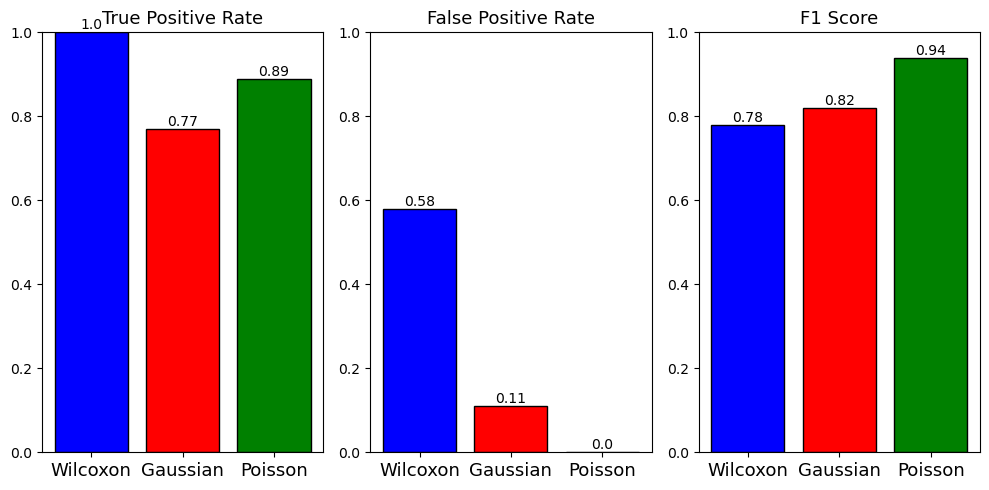

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

bars = axes[0].bar(categories, [DEA[0], EGX[0], OUP[0]], color=colors, edgecolor='black')
axes[0].set_title('True Positive Rate', fontsize=size)
axes[0].set_xticklabels(categories, fontsize=size)
axes[0].set_ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

bars = axes[1].bar(categories, [DEA[1], EGX[1], OUP[1]], color=colors, edgecolor='black')
axes[1].set_title('False Positive Rate', fontsize=size)
axes[1].set_xticklabels(categories, fontsize=size)
axes[1].set_ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

bars = axes[2].bar(categories, [DEA[2], EGX[2], OUP[2]], color=colors, edgecolor='black')
axes[2].set_title('F1 Score', fontsize=size)
axes[2].set_xticklabels(categories, fontsize=size)
axes[2].set_ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('compare_results.png', bbox_inches='tight')

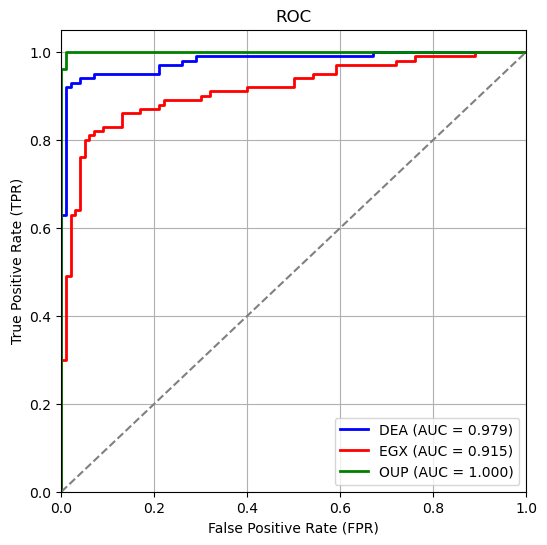

In [19]:
# DEA: Compute ROC curve and AUC
q_dea = np.concatenate((df_dea["q_value"].values, df_dea_BM["q_value"].values))
fpr1, tpr1, _ = roc_curve(~truth, q_dea)
roc_auc1 = auc(fpr1, tpr1)

# EGX: Compute ROC curve and AUC
q_egx = np.concatenate((df_egx["qvalue"].iloc[::2].values, df_egx_BM["qvalue"].iloc[::2].values))
fpr2, tpr2, _ = roc_curve(~truth, q_egx)
roc_auc2 = auc(fpr2, tpr2)

# EGX: Compute ROC curve and AUC
q_oup = np.concatenate((df_oup["q"].values, df_oup_BM["q"].values))
fpr3, tpr3, _ = roc_curve(~truth, q_oup)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(6,6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'DEA (AUC = {roc_auc1:.3f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'EGX (AUC = {roc_auc2:.3f})')
plt.plot(fpr3, tpr3, color='green', lw=2, label=f'OUP (AUC = {roc_auc3:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('ROC.png')

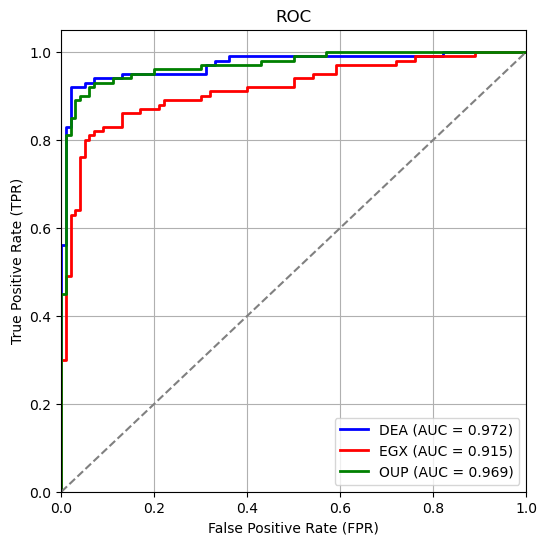

In [20]:
# DEA: Compute ROC curve and AUC
p_dea = np.concatenate((df_dea["p_value"].values, df_dea_BM["p_value"].values))
fpr1, tpr1, _ = roc_curve(~truth, p_dea)
roc_auc1 = auc(fpr1, tpr1)

# EGX: Compute ROC curve and AUC
p_egx = np.concatenate((df_egx["ou2_vs_ou1_pvalue"].iloc[::2].values, df_egx_BM["ou2_vs_ou1_pvalue"].iloc[::2].values))
fpr2, tpr2, _ = roc_curve(~truth, p_egx)
roc_auc2 = auc(fpr2, tpr2)

# EGX: Compute ROC curve and AUC
p_oup = np.concatenate((df_oup["p"].values, df_oup_BM["p"].values))
fpr3, tpr3, _ = roc_curve(~truth, p_oup)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(6,6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'DEA (AUC = {roc_auc1:.3f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'EGX (AUC = {roc_auc2:.3f})')
plt.plot(fpr3, tpr3, color='green', lw=2, label=f'OUP (AUC = {roc_auc3:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('ROC_p.png')

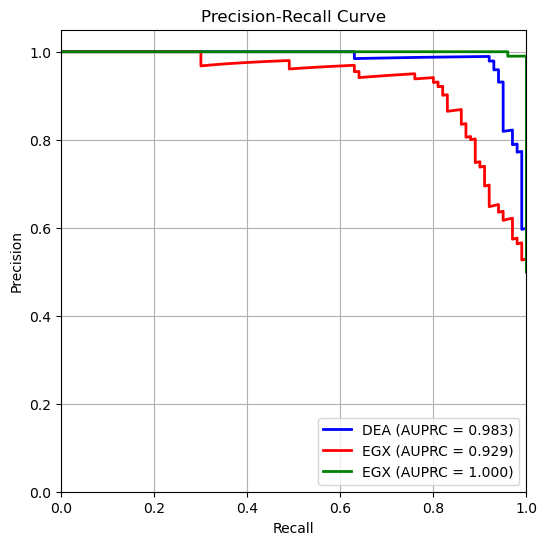

In [21]:
# DEA: Compute Precision-Recall curve and AUC
precision1, recall1, _ = precision_recall_curve(~truth, q_dea)
roc_auc1 = auc(recall1, precision1)

# EGX: Compute Precision-Recall curve and AUC
precision2, recall2, _ = precision_recall_curve(~truth, q_egx)
roc_auc2 = auc(recall2, precision2)

# OUP: Compute Precision-Recall curve and AUC
precision3, recall3, _ = precision_recall_curve(~truth, q_oup)
roc_auc3 = auc(recall3, precision3)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall1, precision1, color='blue', lw=2, label=f'DEA (AUPRC = {roc_auc1:.3f})')
plt.plot(recall2, precision2, color='red', lw=2, label=f'EGX (AUPRC = {roc_auc2:.3f})')
plt.plot(recall3, precision3, color='green', lw=2, label=f'EGX (AUPRC = {roc_auc3:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('Precision_Recall.png')
plt.show()

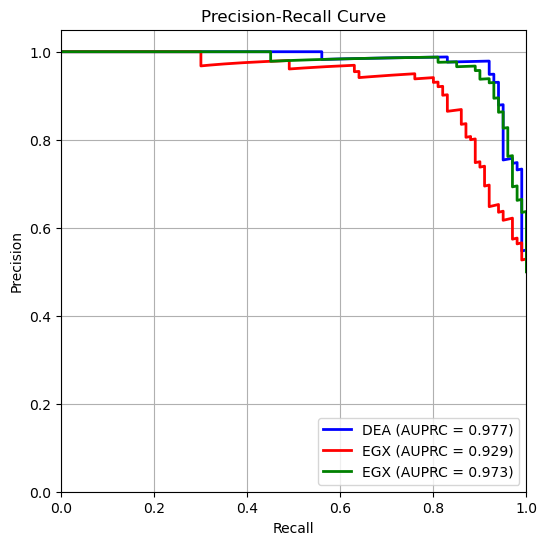

In [22]:
# DEA: Compute Precision-Recall curve and AUC
precision1, recall1, _ = precision_recall_curve(~truth, p_dea)
roc_auc1 = auc(recall1, precision1)

# EGX: Compute Precision-Recall curve and AUC
precision2, recall2, _ = precision_recall_curve(~truth, p_egx)
roc_auc2 = auc(recall2, precision2)

# OUP: Compute Precision-Recall curve and AUC
precision3, recall3, _ = precision_recall_curve(~truth, p_oup)
roc_auc3 = auc(recall3, precision3)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall1, precision1, color='blue', lw=2, label=f'DEA (AUPRC = {roc_auc1:.3f})')
plt.plot(recall2, precision2, color='red', lw=2, label=f'EGX (AUPRC = {roc_auc2:.3f})')
plt.plot(recall3, precision3, color='green', lw=2, label=f'EGX (AUPRC = {roc_auc3:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('Precision_Recall_p.png')
plt.show()